# Kinematic Bicycle Model (운동학적 자전거 모델)
* 운동학적 자전거 모델은 차량의 움직임을 단순화하여 기술하는 모델입니다. 이 모델은 다음과 같은 주요 특징과 가정을 가지고 있습니다.

## 주요 특징:

* **기하학적 관계 기반:** 차량의 조향 각도와 바퀴의 회전 속도와 같은 기하학적인 관계만을 이용하여 차량의 움직임을 예측합니다.
* **미끄러짐 무시 (No-slip condition):** 타이어와 노면 사이의 미끄러짐이 없다고 가정합니다. 즉, 바퀴는 옆방향으로 미끄러지지 않고 회전 방향으로만 움직인다고 가정합니다.
* **저속 주행에 적합:** 주로 저속 또는 중간 속도에서의 차량 움직임을 모델링하는 데 효과적입니다.
* **상대적으로 간단한 계산:** 모델이 단순하여 실시간 제어 및 경로 계획 알고리즘에 용이하게 적용할 수 있습니다.
* **상태 변수:** 일반적으로 차량의 위치 ($x, y$), 차량의 방향 각도 ($ \psi $), 그리고 조향 각도 ($ \delta $)를 상태 변수로 사용합니다.
* **입력:** 주로 차량의 속도 ($v$)와 조향 각도 변화율 ($\dot \delta $) 또는 조향 각도 ($ \delta $)를 입력으로 사용합니다.

## 수학적 표현 (예시):

차량의 무게 중심 (CG)을 기준으로 하는 운동학적 자전거 모델의 간단한 형태는 다음과 같습니다.

* $\dot x = v cos(\psi + \beta)$
* $\dot y = v sin(\psi + \beta)$
* $\dot \psi = \frac{v}{L} cos(\beta) tan(\delta)$
* $\beta = tan^{-1} \left(\frac{l_r tan(\delta)}{L}\right)$

여기서,

* $\dot x, \dot y :$ 차량 무게 중심의 $x, y$ 축 속도
* $\dot \psi :$ 차량의 각속도 (yaw rate)
* $v:$ 차량의 속도
* $\psi:$ 차량의 방향 각도 (heading angle)
* $\delta:$ 전륜 조향 각도
* $L:$ 축거 (wheelbase, 앞바퀴 차축과 뒷바퀴 차축 사이의 거리)
* $\beta:$ 슬립 각 (slip angle) - 운동학적 모델에서는 기하학적으로 정의되는 가상의 각도
* $l_r:$: 차량 무게 중심에서 뒷바퀴 차축까지의 거리

# Dynamic Bicycle Model (동역학적 자전거 모델)
동역학적 자전거 모델은 차량의 움직임을 예측할 때 차량에 작용하는 힘과 모멘트를 고려합니다. 따라서 운동학적 모델보다 더 현실적인 시뮬레이션이 가능합니다.

## 주요 특징:

* **힘과 모멘트 고려:** 타이어-노면 간의 힘, 관성력, 공기 저항 등 차량에 작용하는 다양한 힘과 모멘트를 고려합니다.
* **미끄러짐 고려 (Slip angle):** 타이어의 횡방향 미끄러짐 (slip angle)을 명시적으로 모델링하여 코너링 시의 차량 거동을 더 정확하게 반영합니다.
* **고속 및 동적 주행에 적합:** 급가속, 급제동, 급선회와 같은 동적인 상황에서의 차량 움직임을 더 정확하게 예측할 수 있습니다.
* **상대적으로 복잡한 계산:** 힘과 모멘트 평형 방정식을 풀어야 하므로 운동학적 모델보다 계산이 복잡합니다.
* **상태 변수:** 일반적으로 차량의 위치 $(x, y)$, 방향 각도 $(\psi)$, 횡방향 속도 $(v_y)$, 각속도 $(r)$, 그리고 필요에 따라 롤 각도, 피치 각도 등을 포함합니다.
* **입력:** 조향 토크, 구동/제동 토크 등 차량에 작용하는 힘 또는 토크를 입력으로 사용합니다. 타이어 모델 (예: Pacejka 모델)과 함께 사용되어 타이어력을 계산합니다.

## 수학적 표현 (예시):

차량의 무게 중심 (CG)을 기준으로 하는 동역학적 자전거 모델의 주요 방정식은 다음과 같습니다.

## 병진 운동 방정식:

* $m(\dot v_x-v_yr)=F_{x,f}cos(\delta)-F_{y,f}sin(\delta)+F_{xr}+F_{air,x}$
* $m(\dot v_y-v_xr)=F_{x,f}sin(\delta)+F_{y,f}cos(\delta)+F_{yr}+F_{air,y}$

## 회전 운동 방정식 (Yaw):

* $I_z \dot r=l_r(F_{x,f}sin(\delta)+F_{y,f}cos(\delta))-l_rF_{y,r}+M_{air,z}$

여기서,

* $m:$ 차량의 질량
* $I_z:$ 차량의 yaw 관성 모멘트
* $v_x,v_y:$ 차량 무게 중심의 x, y 축 속도 (차량 좌표계 기준)
* $r:$ 차량의 각속도 (yaw rate)
* $F_{x,f},F_{x,r}:$ 각각 앞, 뒤 바퀴의 longitudinal force (구동력 또는 제동력)
* $F_{y,f},F_{y,r}:$ 각각 앞, 뒤 바퀴의 lateral force (코너링 힘)
* $\delta:$ 전륜 조향 각도
* $l_f, l_r:$ 각각 차량 무게 중심에서 앞, 뒤 바퀴 차축까지의 거리
* $F_{air,x},F_{air,y},M_{air,z}:$ 공기 저항력 및 모멘트
* $\dot x, \dot y, \dot r:$ 각 변수의 시간 변화율

이 방정식에서 타이어력 $(F_{x,f},F_{x,r},F_{yf},F_{y,r})$은 타이어 모델과 타이어에 작용하는 수직 하중, 슬립 각도, 슬립률 등의 함수로 계산됩니다.

## Kinematic vs Dynamic Bicycle Model 비교
|특징	|Kinematic Bicycle Model	|Dynamic Bicycle Model|
|:---|:---|:---|
|기반 원리	|기하학적 관계	|힘과 모멘트 평형|
|미끄러짐	|무시	|고려 (Slip angle)|
|적합 속도	|저속 ~ 중간 속도	|모든 속도, 특히 고속 및 동적 주행|
|계산 |복잡성	|상대적으로 간단	상대적으로 복잡|
|현실성	|단순화된 모델, 현실 세계의 일부 현상 (미끄러짐 등) 무시	|더 현실적인 모델, 차량의 동적 거동 반영|
|주요 사용 분야	|경로 계획, 기본적인 차량 움직임 시뮬레이션, 간단한 제어	|정밀한 차량 시뮬레이션, 고급 제어 시스템 설계 및 검증|
|상태 변수	|$x, y, \psi, \delta$	|$x, y, \psi, v_y, r,$ (필요에 따라 롤, 피치 등 추가)|
|입력	|$v,\dot \delta$  또는 $\delta$	|조향/구동/제동 토크 (타이어 모델과 함께 사용)|

# 1. Kinematic Bicycle Model

start Kinematic Bicycle model simulation


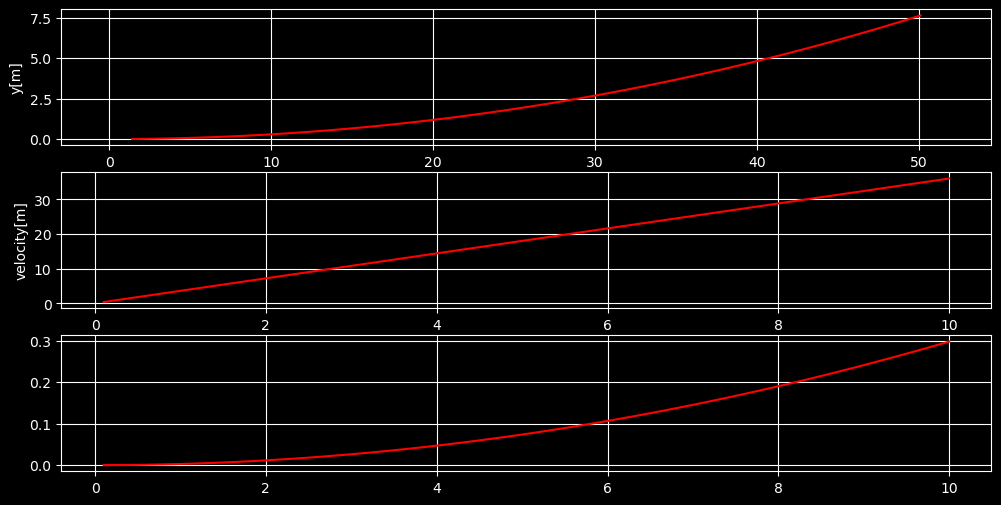

In [9]:
import math
dt = 0.1  # [s]
L = 2.9  # [m]
Lr = 1.4  # [m]

class State:
    def __init__(self, x=Lr, y=0.0, yaw=0.0, v=0.0, beta=0.0):
        self.x = x
        self.y = y
        self.v = v
        self.yaw = yaw
        self.beta = beta
def update(state, a, delta):
    state.beta = math.atan2(Lr / L * math.tan(delta), 1.0)
    state.x = state.x + state.v * math.cos(state.yaw + state.beta) * dt
    state.y = state.y + state.v * math.sin(state.yaw + state.beta) * dt
    state.yaw = state.yaw + state.v / Lr * math.sin(state.beta) * dt
    state.v = state.v + a * dt
    #  print(state.x, state.y, state.yaw, state.v)
    return state
if __name__ == '__main__':
    print('start Kinematic Bicycle model simulation')
    import matplotlib.pyplot as plt
    import numpy as np
    T = 100
    a = [1.0] * T
    delta = [math.radians(1.0)] * T
    #  print(a, delta)
    state = State()
    x = []
    y = []
    yaw = []
    v = []
    beta = []
    time = []
    time = []
    t = 0.0
    for (ai, di) in zip(a, delta):
        t = t + dt
        state = update(state, ai, di)
        x.append(state.x)
        y.append(state.y)
        yaw.append(state.yaw)
        v.append(state.v)
        beta.append(state.beta)
        time.append(t)

    plt.style.use('dark_background')
    plt.figure(figsize=(12,6))
    plt.subplot(3,1,1)
    #flg, ax = plt.subplots(1)
    plt.plot(x, y, color='red')
    plt.xlabel('x[m]')
    plt.ylabel('y[m]')
    plt.ylim(-4,8)
    plt.axis('equal')
    plt.grid(True)
    #flg, ax = plt.subplots(1)
    plt.subplot(3,1,2)
    plt.plot(time, np.array(v) * 3.6, color='red')
    plt.xlabel('Time[km/h]')
    plt.ylabel('velocity[m]')
    plt.grid(True)
    #  flg, ax = plt.subplots(1)
    plt.subplot(3,1,3)
    plt.plot(time, yaw, color='red')
    plt.grid(True)
    plt.show()

# 2. Dynamic Bicycle Model

start Kinematic Bicycle model simulation


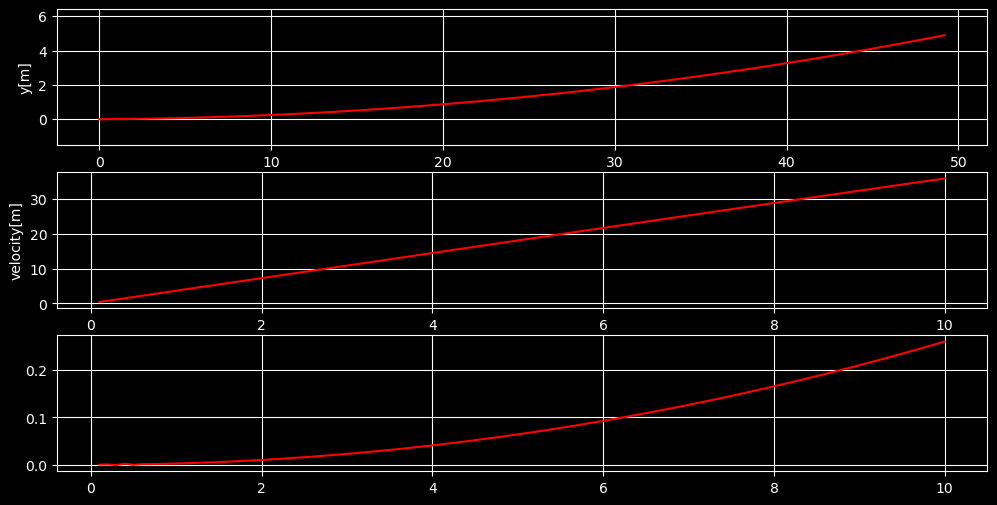

In [ ]:
import math
dt = 0.1  # [s]
L  = 5.0  # [m]
Lr = L / 2.0  # [m]
Lf = L - Lr
L = 2.9
Lr = 1.4
Lf = 1.5
Cf = 1600.0 * 2.0  # N/rad
Cr = 1700.0 * 2.0  # N/rad
Iz = 2250.0  # kg/m2
m  = 1500.0  # kg

class State:
    def __init__(self, x=0.0, y=0.0, yaw=0.0, vx=0.01, vy=0.0, omega=0.0):
        self.x = x
        self.y = y
        self.yaw = yaw
        self.vx = vx
        self.vy = vy
        self.omega = omega
def update(state, a, delta):
    state.x = state.x + state.vx * math.cos(state.yaw) * dt - state.vy * math.sin(state.yaw) * dt
    state.y = state.y + state.vx * math.sin(state.yaw) * dt + state.vy * math.cos(state.yaw) * dt
    state.yaw = state.yaw + state.omega * dt
    Ffy = -Cf * math.atan2(((state.vy + Lf * state.omega) / state.vx - delta), 1.0)
    Fry = -Cr * math.atan2((state.vy - Lr * state.omega) / state.vx, 1.0)
    state.vx = state.vx + (a - Ffy * math.sin(delta) / m + state.vy * state.omega) * dt
    state.vy = state.vy + (Fry / m + Ffy * math.cos(delta) / m - state.vx * state.omega) * dt
    state.omega = state.omega + (Ffy * Lf * math.cos(delta) - Fry * Lr) / Iz * dt
    return state
if __name__ == '__main__':
    print('start Kinematic Bicycle model simulation')
    import matplotlib.pyplot as plt
    import numpy as np
    T = 100
    a = [1.0] * T
    delta = [math.radians(1.0)] * T
    #  print(a, delta)
    state = State()
    x = []
    y = []
    yaw = []
    vx, vy = [], []
    time = []
    t = 0.0
    for (ai, di) in zip(a, delta):
        t = t + dt
        state = update(state, ai, di)
        x.append(state.x)
        y.append(state.y)
        yaw.append(state.yaw)
        vx.append(state.vx)
        vy.append(state.vy)
        time.append(t)
    plt.style.use('dark_background')
    plt.figure(figsize=(12,6))
    plt.subplot(3,1,1)
    #flg, ax = plt.subplots(1)
    plt.plot(x, y, color='red')
    plt.xlabel('x[m]')
    plt.ylabel('y[m]')
    plt.ylim(-4,8)
    plt.axis('equal')
    plt.grid(True)
    #flg, ax = plt.subplots(1)
    plt.subplot(3,1,2)
    plt.plot(time, np.array(vx) * 3.6, color='red')
    plt.xlabel('Time[km/h]')
    plt.ylabel('velocity[m]')
    plt.grid(True)
    #  flg, ax = plt.subplots(1)
    plt.subplot(3,1,3)
    plt.plot(time, yaw, color='red')
    plt.grid(True)
    plt.show()

# 3. Comparison of Two Models

**1. 필요한 라이브러리 임포트:**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

**2. 운동학적 자전거 모델 클래스:**

In [5]:
class KinematicBicycleModel:
    def __init__(self, wheelbase, lr):
        self.L = wheelbase
        self.lr = lr
        self.x = 0.0
        self.y = 0.0
        self.psi = 0.0

    def update(self, v, delta, dt):
        beta = math.atan((self.lr * math.tan(delta)) / self.L)
        self.x += v * math.cos(self.psi + beta) * dt
        self.y += v * math.sin(self.psi + beta) * dt
        self.psi += (v / self.L) * math.tan(delta) * dt

    def set_state(self, x, y, psi):
        self.x = x
        self.y = y
        self.psi = psi

**3. 동역학적 자전거 모델 클래스 (단순화):**

In [6]:
class DynamicBicycleModel:
    def __init__(self, wheelbase, mass, inertia_z, cf, cr, lf, lr):
        self.L = wheelbase
        self.m = mass
        self.Iz = inertia_z
        self.Cf = cf  # Front cornering stiffness
        self.Cr = cr  # Rear cornering stiffness
        self.lf = lf
        self.lr = lr
        self.x = 0.0
        self.y = 0.0
        self.psi = 0.0
        self.vx = 0.0
        self.vy = 0.0
        self.r = 0.0  # Yaw rate

    def update(self, ax, delta, dt):
        # 단순화된 횡방향 힘 계산 (선형 타이어 모델 가정)
        alpha_f = math.atan2(self.vy + self.lf * self.r, self.vx + 1e-9) - delta
        alpha_r = math.atan2(self.vy - self.lr * self.r, self.vx + 1e-9)

        Fyf = - self.Cf * alpha_f
        Fyr = - self.Cr * alpha_r

        # 운동 방정식
        self.dvx_dt = ax + (self.vy * self.r) + (Fyf * math.sin(delta)) / self.m
        self.dvy_dt = (Fyf * math.cos(delta) + Fyr) / self.m - (self.vx * self.r)
        self.dr_dt = (self.lf * Fyf * math.cos(delta) - self.lr * Fyr) / self.Iz

        self.vx += self.dvx_dt * dt
        self.vy += self.dvy_dt * dt
        self.r += self.dr_dt * dt

        self.x += (self.vx * math.cos(self.psi) - self.vy * math.sin(self.psi)) * dt
        self.y += (self.vx * math.sin(self.psi) + self.vy * math.cos(self.psi)) * dt
        self.psi += self.r * dt

    def set_state(self, x, y, psi, vx=0.0, vy=0.0, r=0.0):
        self.x = x
        self.y = y
        self.psi = psi
        self.vx = vx
        self.vy = vy
        self.r = r

**4. 장애물 및 시뮬레이션 설정:**

* **Single Obstacle**

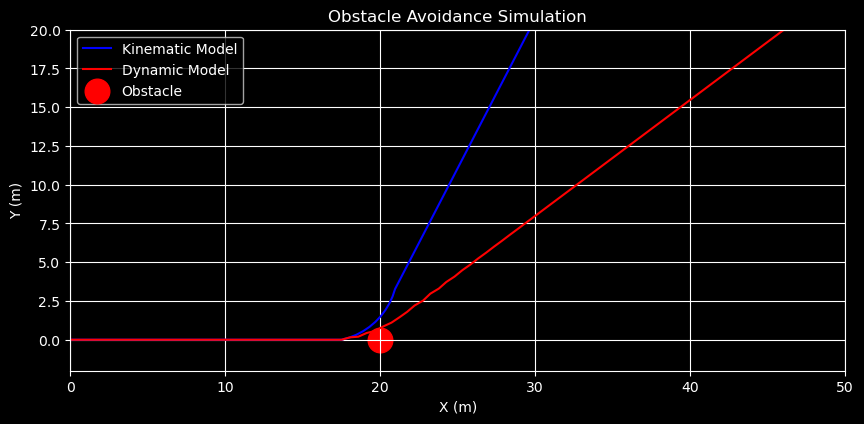

In [7]:
# 차량 파라미터
wheelbase = 2.5
mass = 1500.0
inertia_z = 2500.0
cf = 80000.0
cr = 80000.0
lf = wheelbase / 2
lr = wheelbase / 2

# 모델 생성
kinematic_model = KinematicBicycleModel(wheelbase, lr)
dynamic_model = DynamicBicycleModel(wheelbase, mass, inertia_z, cf, cr, lf, lr)

# 초기 상태 설정
initial_x = 0.0
initial_y = 0.0 #-5.0
initial_psi = 0.0
kinematic_model.set_state(initial_x, initial_y, initial_psi)
dynamic_model.set_state(initial_x, initial_y, initial_psi, vx=5.0) # 초기 속도 부여

# 장애물 위치
obstacle_x = 20.0 #10.0
obstacle_y = 0.0
obstacle_radius = 1.0

# 시뮬레이션 파라미터
dt = 0.1
total_time = 10.0
time_steps = int(total_time / dt)

# 제어 입력 (간단한 장애물 회피 로직)
def kinematic_control(x, y, psi, obstacle_x, obstacle_y, obstacle_radius):
    angle_to_obstacle = math.atan2(obstacle_y - y, obstacle_x - x)
    angle_diff = angle_to_obstacle - psi
    angle_diff = math.atan2(math.sin(angle_diff), math.cos(angle_diff)) # Normalize angle

    distance_to_obstacle = math.sqrt((obstacle_x - x)**2 + (obstacle_y - y)**2)

    if distance_to_obstacle < obstacle_radius + 2:
        # 장애물 근처에서는 회피 조향
        if angle_diff > 0:
            delta = -0.5  # 오른쪽으로 회피
        else:
            delta = 0.5   # 왼쪽으로 회피
    else:
        delta = 0.0       # 직진

    v = 5.0 # Constant velocity
    return v, delta

def dynamic_control(x, y, psi, vx, obstacle_x, obstacle_y, obstacle_radius):
    angle_to_obstacle = math.atan2(obstacle_y - y, obstacle_x - x)
    angle_diff = angle_to_obstacle - psi
    angle_diff = math.atan2(math.sin(angle_diff), math.cos(angle_diff)) # Normalize angle

    distance_to_obstacle = math.sqrt((obstacle_x - x)**2 + (obstacle_y - y)**2)

    if distance_to_obstacle < obstacle_radius + 2:
        # 장애물 근처에서는 회피 조향
        if angle_diff > 0:
            delta = -0.3  # 오른쪽으로 회피 (동역학 고려하여 조향각 감소)
        else:
            delta = 0.3   # 왼쪽으로 회피
    else:
        delta = 0.0       # 직진

    ax = 0.0 # Constant longitudinal acceleration (for constant speed)
    return ax, delta

# 시뮬레이션 결과 저장
kinematic_states = [(initial_x, initial_y)]
dynamic_states = [(initial_x, initial_y)]

# 시뮬레이션 루프
for _ in range(time_steps):
    # 운동학적 모델 업데이트
    v_kinematic, delta_kinematic = kinematic_control(
        kinematic_model.x, kinematic_model.y, kinematic_model.psi,
        obstacle_x, obstacle_y, obstacle_radius
    )
    kinematic_model.update(v_kinematic, delta_kinematic, dt)
    kinematic_states.append((kinematic_model.x, kinematic_model.y))

    # 동역학적 모델 업데이트
    ax_dynamic, delta_dynamic = dynamic_control(
        dynamic_model.x, dynamic_model.y, dynamic_model.psi, dynamic_model.vx,
        obstacle_x, obstacle_y, obstacle_radius
    )
    dynamic_model.update(ax_dynamic, delta_dynamic, dt)
    dynamic_states.append((dynamic_model.x, dynamic_model.y))

# 결과 시각화
plt.style.use('dark_background')
plt.figure(figsize=(10, 8))
plt.plot([state[0] for state in kinematic_states], [state[1] for state in kinematic_states], 
         label='Kinematic Model', color='blue', linestyle='-')
plt.plot([state[0] for state in dynamic_states], [state[1] for state in dynamic_states], 
         label='Dynamic Model', color='red', linestyle='-')
plt.scatter(obstacle_x, obstacle_y, s=np.pi * obstacle_radius**2 * 100, color='red', label='Obstacle')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('Obstacle Avoidance Simulation')
plt.legend()
plt.grid(True)
plt.xlim(0, 50) #(-5, 15)
plt.ylim(-2,20) #(-7, 7)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

* **Multi Obstacles**

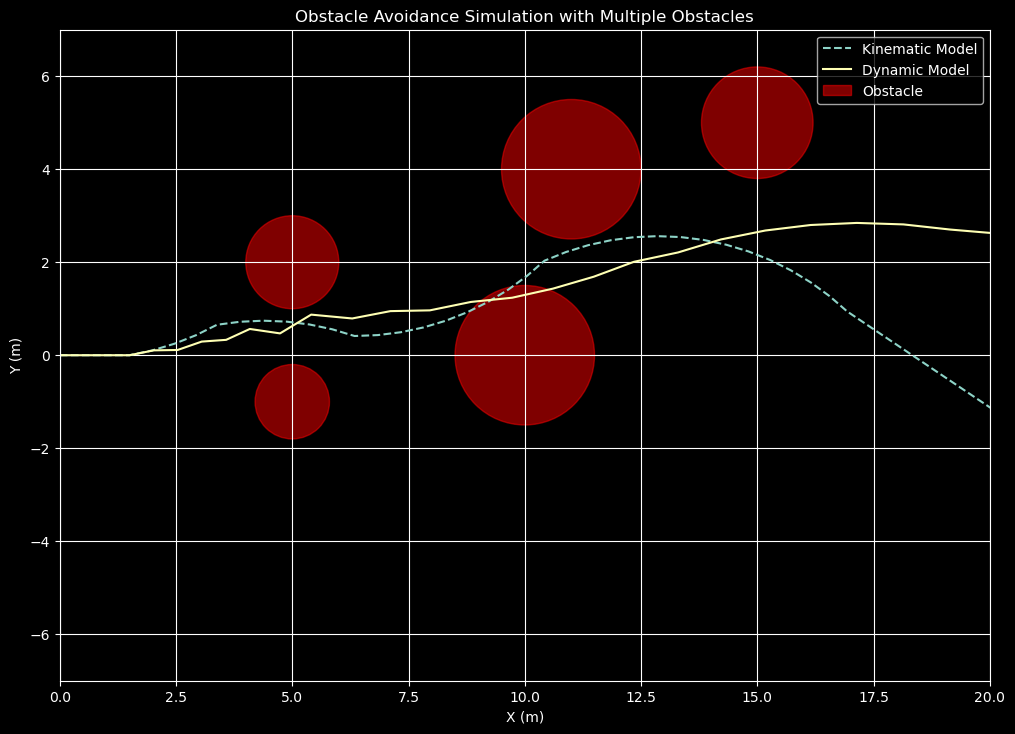

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math

class KinematicBicycleModel:
    def __init__(self, wheelbase, lr_ratio=0.5):
        self.L = wheelbase
        self.lr = wheelbase * lr_ratio
        self.x = 0.0
        self.y = 0.0
        self.psi = 0.0

    def update(self, v, delta, dt):
        beta = math.atan((self.lr * math.tan(delta)) / self.L)
        self.x += v * math.cos(self.psi + beta) * dt
        self.y += v * math.sin(self.psi + beta) * dt
        self.psi += (v / self.L) * math.tan(delta) * dt

    def set_state(self, x, y, psi):
        self.x = x
        self.y = y
        self.psi = psi

class DynamicBicycleModel:
    def __init__(self, wheelbase, mass, inertia_z, cf, cr, lf_ratio=0.5):
        self.L = wheelbase
        self.m = mass
        self.Iz = inertia_z
        self.Cf = cf  # Front cornering stiffness
        self.Cr = cr  # Rear cornering stiffness
        self.lf = wheelbase * lf_ratio
        self.lr = wheelbase * (1 - lf_ratio)
        self.x = 0.0
        self.y = 0.0
        self.psi = 0.0
        self.vx = 0.0
        self.vy = 0.0
        self.r = 0.0  # Yaw rate

    def update(self, ax, delta, dt):
        # 단순화된 횡방향 힘 계산 (선형 타이어 모델 가정)
        alpha_f = math.atan2(self.vy + self.lf * self.r, self.vx + 1e-9) - delta
        alpha_r = math.atan2(self.vy - self.lr * self.r, self.vx + 1e-9)

        Fyf = - self.Cf * alpha_f
        Fyr = - self.Cr * alpha_r

        # 운동 방정식
        self.dvx_dt = ax + (self.vy * self.r) + (Fyf * math.sin(delta)) / self.m
        self.dvy_dt = (Fyf * math.cos(delta) + Fyr) / self.m - (self.vx * self.r)
        self.dr_dt = (self.lf * Fyf * math.cos(delta) - self.lr * Fyr) / self.Iz

        self.vx += self.dvx_dt * dt
        self.vy += self.dvy_dt * dt
        self.r += self.dr_dt * dt

        self.x += (self.vx * math.cos(self.psi) - self.vy * math.sin(self.psi)) * dt
        self.y += (self.vx * math.sin(self.psi) + self.vy * math.cos(self.psi)) * dt
        self.psi += self.r * dt

    def set_state(self, x, y, psi, vx=0.0, vy=0.0, r=0.0):
        self.x = x
        self.y = y
        self.psi = psi
        self.vx = vx
        self.vy = vy
        self.r = r

# 차량 파라미터
wheelbase = 2.5
mass = 1500.0
inertia_z = 2500.0
cf = 80000.0
cr = 80000.0
lf_ratio = 0.5

# 모델 생성
kinematic_model = KinematicBicycleModel(wheelbase)
dynamic_model = DynamicBicycleModel(wheelbase, mass, inertia_z, cf, cr, lf_ratio)

# 초기 상태 설정
initial_x = 0.0
initial_y = 0.0 #-5.0
initial_psi = 0.0
kinematic_model.set_state(initial_x, initial_y, initial_psi)
dynamic_model.set_state(initial_x, initial_y, initial_psi, vx=5.0) # 초기 속도 부여

# 장애물 위치 및 반지름
obstacles = [
    {'x':  5.0, 'y': -1.0, 'r': 0.8},
    {'x':  5.0, 'y':  2.0, 'r': 1.0},
    {'x': 10.0, 'y':  0.0, 'r': 1.5},
    {'x': 11.0, 'y':  4.0, 'r': 1.5},
    {'x': 15.0, 'y':  5.0, 'r': 1.2}
]

# 시뮬레이션 파라미터
dt = 0.1
total_time = 20.0
time_steps = int(total_time / dt)

# 제어 입력 (간단한 장애물 회피 로직 - 각 장애물에 대해 순차적으로 회피)
def kinematic_control(x, y, psi, obstacles):
    v = 5.0
    delta = 0.0
    min_dist = float('inf')
    closest_obstacle = None

    for obs in obstacles:
        dist = math.sqrt((obs['x'] - x)**2 + (obs['y'] - y)**2)
        if dist < min_dist:
            min_dist = dist
            closest_obstacle = obs

    if closest_obstacle and min_dist < closest_obstacle['r'] + 3:
        angle_to_obstacle = math.atan2(closest_obstacle['y'] - y, closest_obstacle['x'] - x)
        angle_diff = angle_to_obstacle - psi
        angle_diff = math.atan2(math.sin(angle_diff), math.cos(angle_diff))

        if angle_diff > 0.1:
            delta = -0.4  # 오른쪽으로 회피
        elif angle_diff < -0.1:
            delta = 0.4   # 왼쪽으로 회피
        else:
            delta = 0.0
    return v, delta

def dynamic_control(x, y, psi, vx, obstacles):
    ax = 0.0
    delta = 0.0
    min_dist = float('inf')
    closest_obstacle = None

    for obs in obstacles:
        dist = math.sqrt((obs['x'] - x)**2 + (obs['y'] - y)**2)
        if dist < min_dist:
            min_dist = dist
            closest_obstacle = obs

    if closest_obstacle and min_dist < closest_obstacle['r'] + 3:
        angle_to_obstacle = math.atan2(closest_obstacle['y'] - y, closest_obstacle['x'] - x)
        angle_diff = angle_to_obstacle - psi
        angle_diff = math.atan2(math.sin(angle_diff), math.cos(angle_diff))

        if angle_diff > 0.1:
            delta = -0.2  # 오른쪽으로 회피 (동역학 고려하여 조향각 감소)
        elif angle_diff < -0.1:
            delta = 0.2   # 왼쪽으로 회피
        else:
            delta = 0.0
    return ax, delta

# 시뮬레이션 결과 저장
kinematic_states = [(initial_x, initial_y)]
dynamic_states = [(initial_x, initial_y)]

# 시뮬레이션 루프
for _ in range(time_steps):
    # 운동학적 모델 업데이트
    v_kinematic, delta_kinematic = kinematic_control(
        kinematic_model.x, kinematic_model.y, kinematic_model.psi,
        obstacles
    )
    kinematic_model.update(v_kinematic, delta_kinematic, dt)
    kinematic_states.append((kinematic_model.x, kinematic_model.y))

    # 동역학적 모델 업데이트
    ax_dynamic, delta_dynamic = dynamic_control(
        dynamic_model.x, dynamic_model.y, dynamic_model.psi, dynamic_model.vx,
        obstacles
    )
    dynamic_model.update(ax_dynamic, delta_dynamic, dt)
    dynamic_states.append((dynamic_model.x, dynamic_model.y))

# 결과 시각화
plt.figure(figsize=(12, 10))
plt.plot([state[0] for state in kinematic_states], [state[1] for state in kinematic_states], label='Kinematic Model', linestyle='--')
plt.plot([state[0] for state in dynamic_states], [state[1] for state in dynamic_states], label='Dynamic Model')
for obs in obstacles:
    circle = plt.Circle((obs['x'], obs['y']), obs['r'], color='red', alpha=0.5, label='Obstacle' if obs == obstacles[0] else "")
    plt.gca().add_patch(circle)
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('Obstacle Avoidance Simulation with Multiple Obstacles')
plt.legend()
plt.grid(True)
plt.xlim(0, 20)
plt.ylim(-7, 7)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()